In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

In [3]:
np.random.seed(1234)

https://people.duke.edu/~ccc14/sta-663/MCMC.html

### The Posterior Distribution

$$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)}$$

The Likelihood: $p(X|\theta)$

The Prior: $p(\theta)$

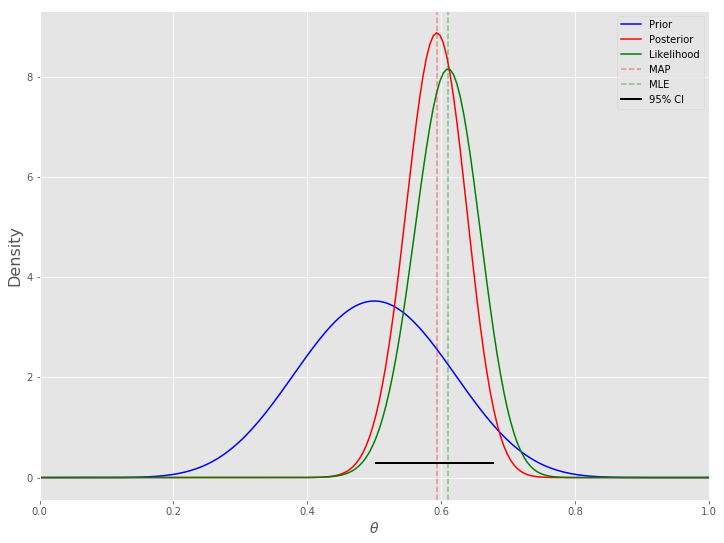

In [4]:
n = 100
h = 61
p = h/n
rv = st.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();


In [5]:
np.linspace(0, 1, 200)

array([0.    , 0.005 , 0.0101, 0.0151, 0.0201, 0.0251, 0.0302, 0.0352,
       0.0402, 0.0452, 0.0503, 0.0553, 0.0603, 0.0653, 0.0704, 0.0754,
       0.0804, 0.0854, 0.0905, 0.0955, 0.1005, 0.1055, 0.1106, 0.1156,
       0.1206, 0.1256, 0.1307, 0.1357, 0.1407, 0.1457, 0.1508, 0.1558,
       0.1608, 0.1658, 0.1709, 0.1759, 0.1809, 0.1859, 0.191 , 0.196 ,
       0.201 , 0.206 , 0.2111, 0.2161, 0.2211, 0.2261, 0.2312, 0.2362,
       0.2412, 0.2462, 0.2513, 0.2563, 0.2613, 0.2663, 0.2714, 0.2764,
       0.2814, 0.2864, 0.2915, 0.2965, 0.3015, 0.3065, 0.3116, 0.3166,
       0.3216, 0.3266, 0.3317, 0.3367, 0.3417, 0.3467, 0.3518, 0.3568,
       0.3618, 0.3668, 0.3719, 0.3769, 0.3819, 0.3869, 0.392 , 0.397 ,
       0.402 , 0.407 , 0.4121, 0.4171, 0.4221, 0.4271, 0.4322, 0.4372,
       0.4422, 0.4472, 0.4523, 0.4573, 0.4623, 0.4673, 0.4724, 0.4774,
       0.4824, 0.4874, 0.4925, 0.4975, 0.5025, 0.5075, 0.5126, 0.5176,
       0.5226, 0.5276, 0.5327, 0.5377, 0.5427, 0.5477, 0.5528, 0.5578,
      

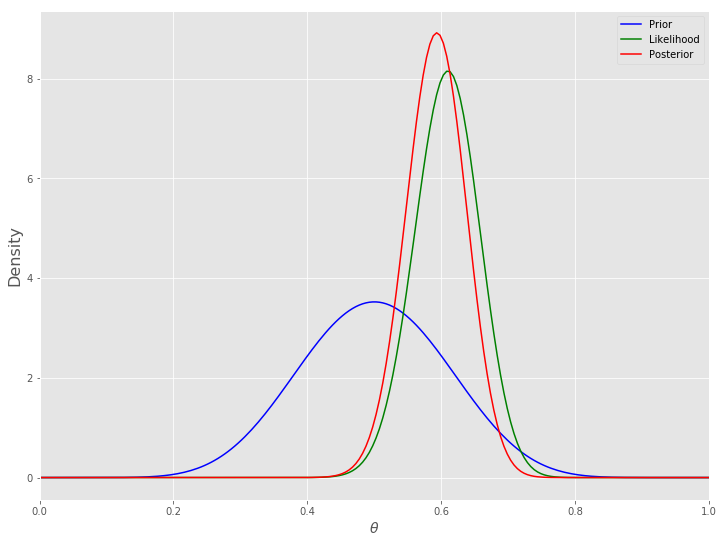

In [15]:
thetas = np.linspace(0, 1, 200)
prior = st.beta(a, b)

post = prior.pdf(thetas) * st.binom(n, thetas).pmf(h)
post /= (post.sum() / len(thetas))

plt.figure(figsize=(12, 9))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();
